In [1]:
# global alignment dan local

# cuman pengen tau mirip nda antara 2 sequence , kalau alignment dia end to end, kalau local dia nda secara end to end dia hanya tengah" aja saat mencari similaritynya

# ini global
# ACGACT
# A----C
# kalau local
# AC

test


Global

In [1]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq

In [2]:
seq1 = Seq('ACTCGT')
seq2 = Seq('ATTCG')

In [4]:
alignments = pairwise2.align.globalxx(seq1,seq2)

alignments

[Alignment(seqA='ACT-CGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='AC-TCGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='ACTCGT', seqB='ATTCG-', score=4.0, start=0, end=6)]

In [5]:
print(format_alignment(*alignments[0]))

ACT-CGT
| | || 
A-TTCG-
  Score=4



Local

In [6]:
loc_alignment = pairwise2.align.localxx(seq1,seq2)

loc_alignment

[Alignment(seqA='ACT-CGT', seqB='A-TTCG-', score=4.0, start=0, end=6),
 Alignment(seqA='AC-TCGT', seqB='A-TTCG-', score=4.0, start=0, end=6),
 Alignment(seqA='ACTCGT', seqB='ATTCG-', score=4.0, start=0, end=5)]

In [7]:
print(format_alignment(*loc_alignment[0]))

1 ACT-CG
  | | ||
1 A-TTCG
  Score=4



menampilkan score only

In [9]:
score = pairwise2.align.localxx(seq1,seq2,score_only = True,one_alignment_only= True)

score

4.0

akurasi

In [10]:
score / len(seq1) * 100

66.66666666666666

In [31]:
SeqA = Seq('AAGGCTT')
SeqB = Seq('AAGGCC')
SeqC = Seq('AAGGCAT')

In [16]:
AvB = pairwise2.align.localxx(SeqA,SeqB,score_only = True,one_alignment_only= True)
BvC = pairwise2.align.localxx(SeqB,SeqC,score_only = True,one_alignment_only= True)
CvA = pairwise2.align.localxx(SeqC,SeqA,score_only = True,one_alignment_only= True)

print('AvB', AvB / len(SeqB)* 100)
print('BvC', BvC / len(SeqB)* 100)
print('CvA', CvA / len(SeqC)* 100)

# ini udah masuk ke seimilarity analysis


AvB 83.33333333333334
BvC 83.33333333333334
CvA 85.71428571428571


hamming distance -> dua sequence yang sama 

ada berapa yang nd cocok

In [33]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [32]:
hamming_distance(SeqA,SeqB)

1

In [34]:
seqA = Seq('ACTGT')
seqB = Seq('AGTGT')

hamming_distance(seqA,seqB)

1

In [44]:
from Levenshtein import distance

distance(str(seqA), str(seqB))

1

Tida ada di ujian yang bawah ini 

In [56]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2, i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def MakeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)

    return[[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t,seq1,seq2,nonblank = chr(0x25A0), blank = ''):
    print(" |" + seq2)
    print("-" *(2+ len(seq2)))

    for label,row in zip(seq1,M):
        line = ' '.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2, k = 1, t = 1):
    M = MakeMatrix(seq1,seq2,k)
    plotMatrix(M,t,seq1,seq2)

seq1 = Seq("ATTA")
seq2 = Seq("ACGT")

dotplot(seq1,seq2)

seq1 = Seq("AGGTA")
seq2 = Seq("AGA")

dotplot(seq1,seq2)

# kamer group sesuai jumlah k


 |ACGT
------
A|■   
T|   ■
T|   ■
A|■   
 |AGA
-----
A|■  ■
G| ■ 
G| ■ 
T|  
A|■  ■


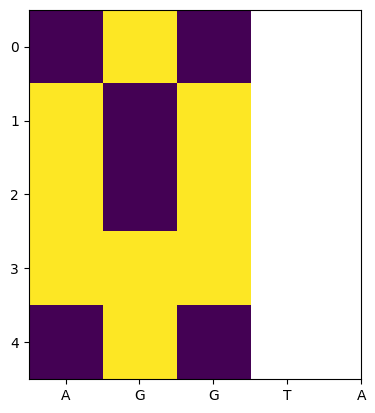

In [58]:
import numpy as  np
import matplotlib.pyplot as plt

def dotPlotFancy(seq1,seq2):
    plt.imshow(np.array(MakeMatrix(seq1,seq2,1)))
    xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
    xy = plt.xticks(np.arange(len(list(seq1))), list(seq1))

    plt.show()

dotPlotFancy(seq1,seq2)